<a href="https://colab.research.google.com/github/Benitmulindwa/Cheminformatics/blob/main/fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rdkit pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 9.4 MB/s eta 0:00:00


In [16]:
import pandas as pd
import numpy as np
import seaborn as sn
#---------------------- RDKit packages
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning

In [40]:
dataset = pd.read_csv('https://raw.githubusercontent.com/gashawmg/HOMO-LUMO-Enegry-gap-Prediction/master/Orbital_Energies_input_data.csv')
dataset.head(10)

,SMILES,Energygap
0,Cc1ccc(cc1)C(F)(F)F,197.749421
1,OC(=O)CCCCl,247.493942
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327
3,Nc1ccc(Cl)c(Cl)c1,169.027707
4,C[C@@H](CCO)CCC=C(C)C,209.569808
5,OC(C=C)C=C,210.979194
6,O=N(=O)c1ccc(Cl)c(c1)N(=O)=O,168.833179
7,O=CC1CCCCC1,213.451579
8,COc1ccc(cc1)C#C,171.191985
9,Brc1cncnc1,188.344944


In [41]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(dataset,'SMILES', 'structure')

In [42]:
dataset.head()

,SMILES,Energygap,structure
0,Cc1ccc(cc1)C(F)(F)F,197.749421,<rdkit.Chem.rdchem.Mol object at 0x7d556da85a80>
1,OC(=O)CCCCl,247.493942,<rdkit.Chem.rdchem.Mol object at 0x7d55797f31b0>
2,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,164.712327,<rdkit.Chem.rdchem.Mol object at 0x7d556da78270>
3,Nc1ccc(Cl)c(Cl)c1,169.027707,<rdkit.Chem.rdchem.Mol object at 0x7d556da780b0>
4,C[C@@H](CCO)CCC=C(C)C,209.569808,<rdkit.Chem.rdchem.Mol object at 0x7d556da78350>


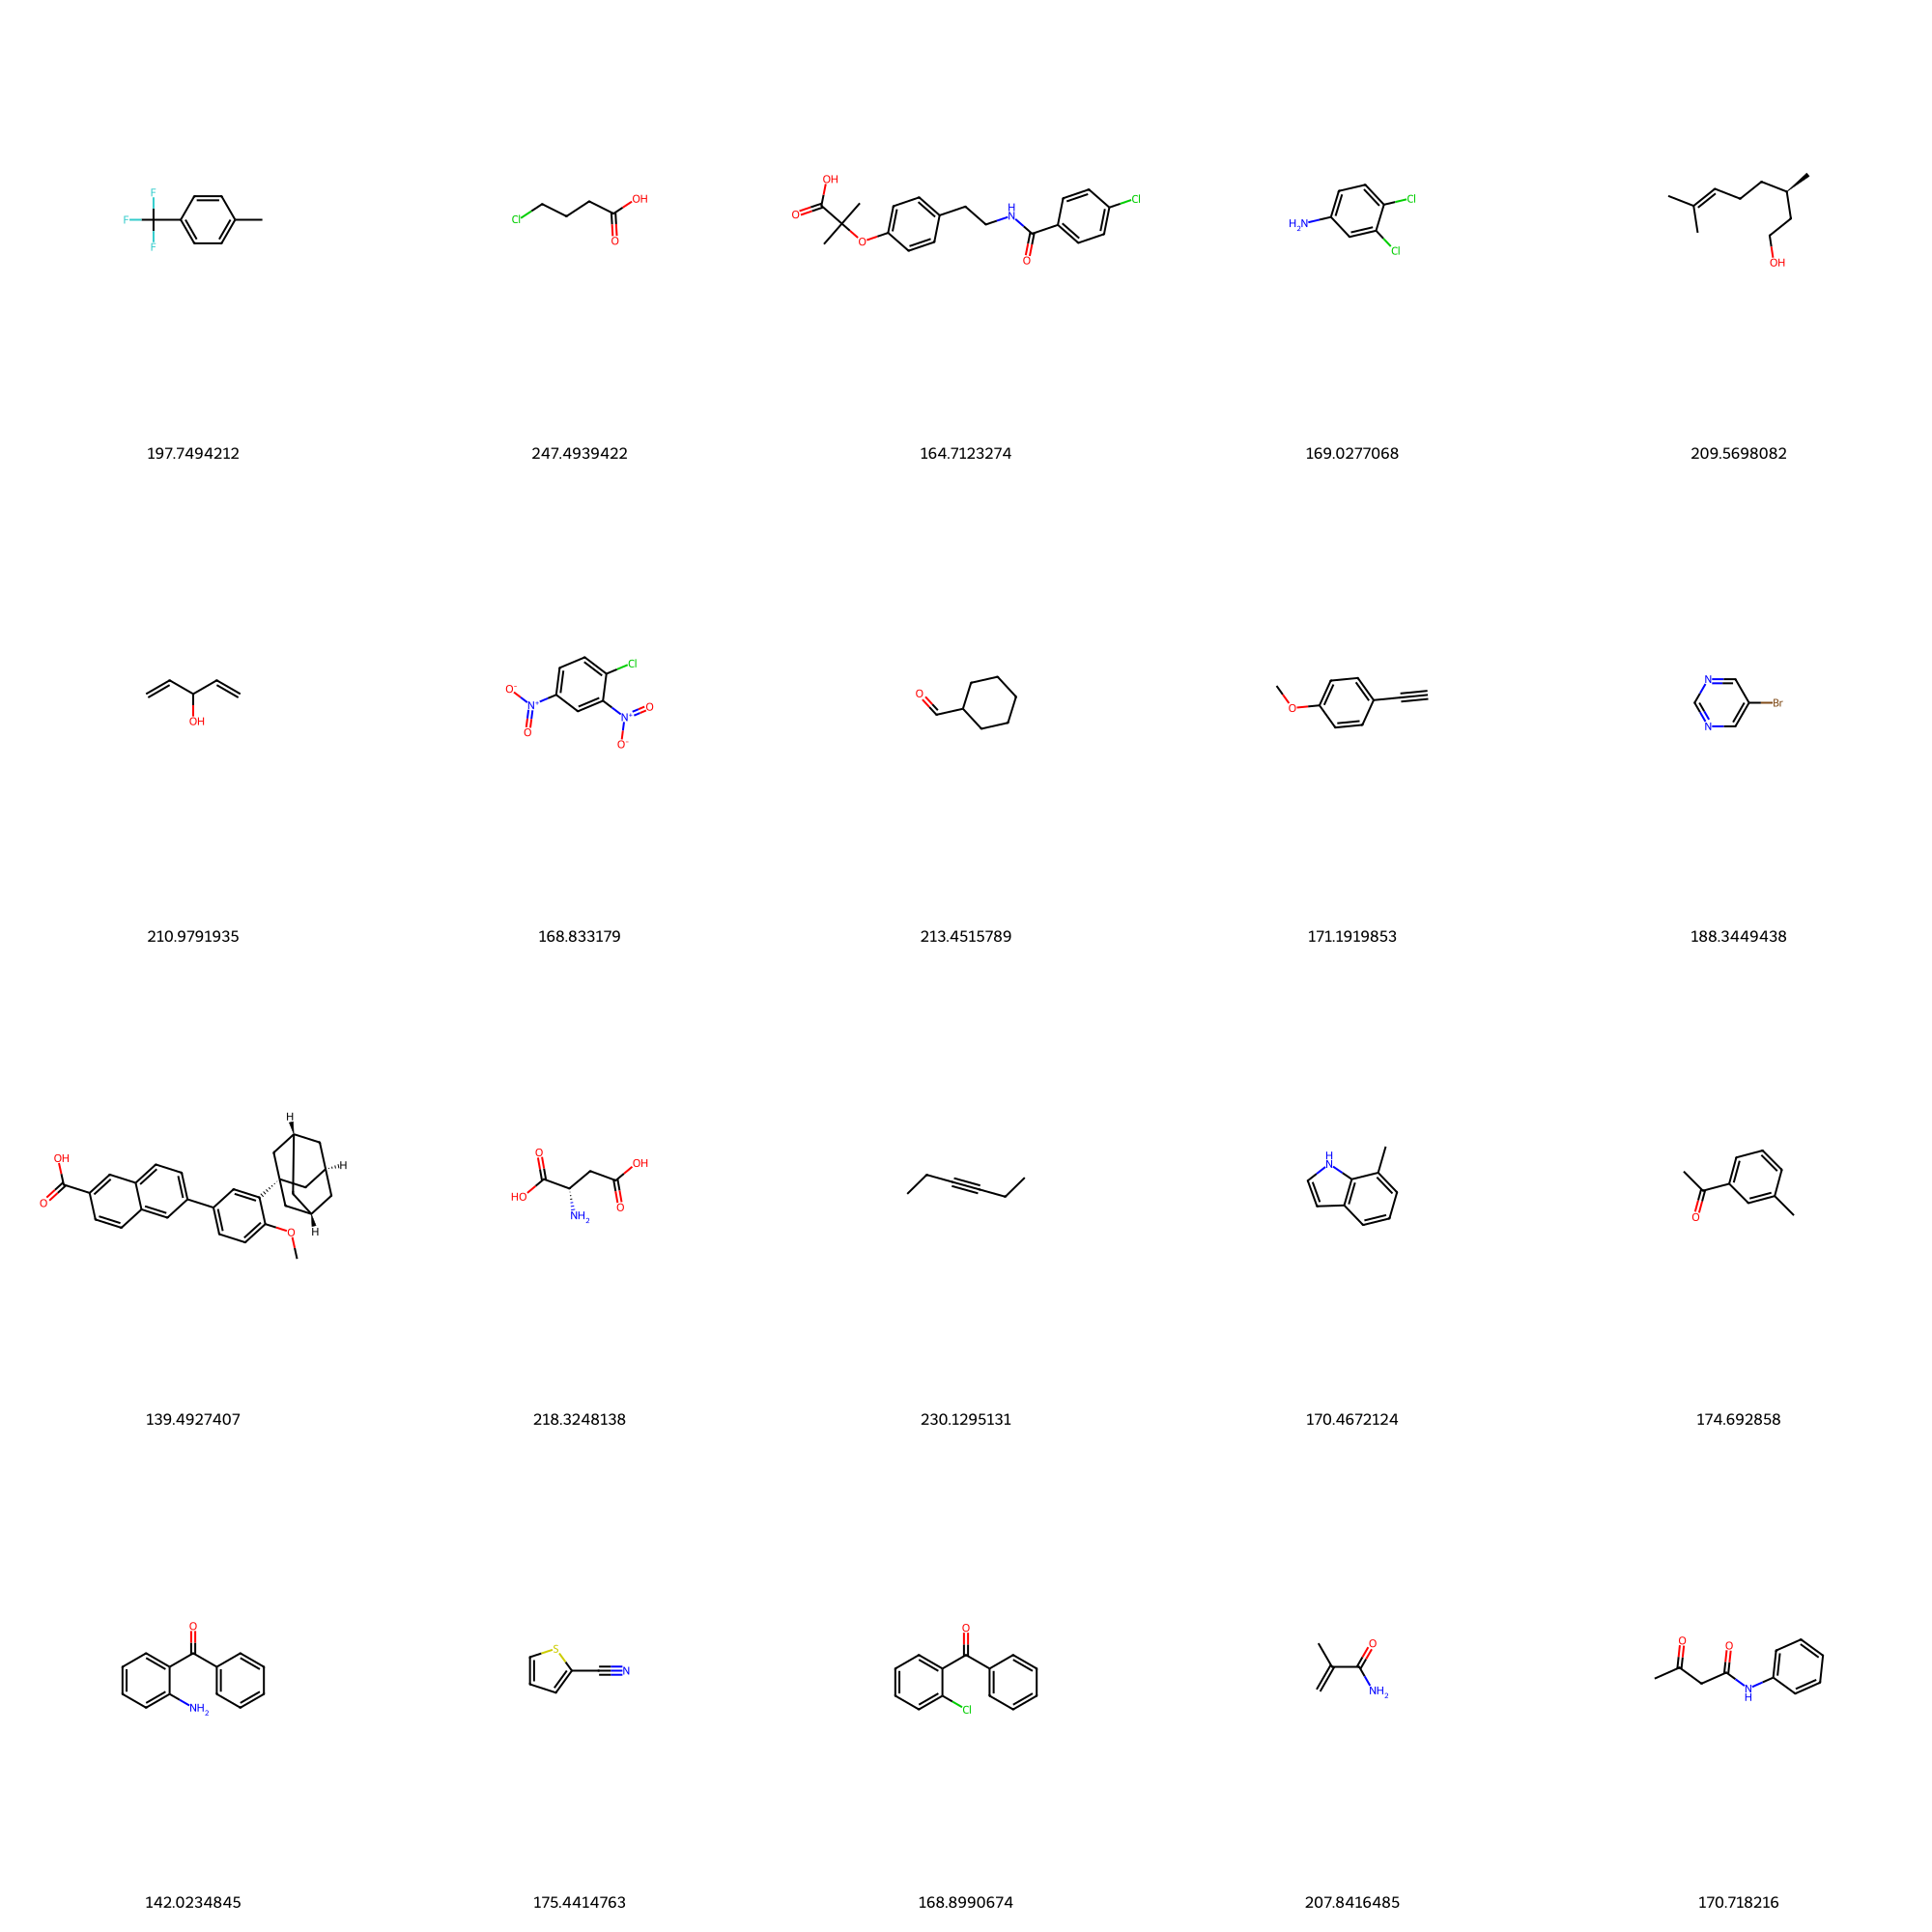

In [47]:
from re import L
from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in dataset['structure']][:20], molsPerRow=5, maxMols=100,subImgSize=(400,500), legends=[str(x) for x in dataset['Energygap']] )

# 1. MACCS-keys Fingerprint (166 public keys)

- it's 162bits
- it's mainly used for substructure search

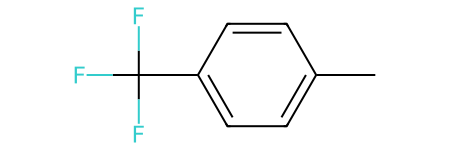

In [49]:
dataset.structure[0]

In [60]:
# Generate MACCS (Molecular ACCess System) keys
from rdkit.Chem import MACCSkeys
import numpy as np

Mkeys = MACCSkeys.GenMACCSKeys(dataset.structure[0])

# Use numpy array to see On and Off bits
print(np.array(Mkeys))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0]


In [61]:
len(Mkeys)

167

**Accesing** **ON** **bits**

In [66]:
print('ON bits INDEXES: ', tuple(Mkeys.GetOnBits()))
# Number of ON bits

print('Number of ON bits: ', len(Mkeys.GetOnBits()))

ON bits INDEXES:  (42, 106, 107, 112, 134, 160, 162, 163, 165)
Number of ON bits:  9


In [67]:
print('ON bits INDEXES: ', np.nonzero(Mkeys))
# Number of ON bits

print('Number of ON bits: ', np.count_nonzero(Mkeys))

ON bits INDEXES:  (array([ 42, 106, 107, 112, 134, 160, 162, 163, 165]),)
Number of ON bits:  9


# 2. Avalon Fingerprint

- it uses a fingerprint generator that enumerates certain paths and feature classes of the molecular graph

In [70]:
from rdkit.Avalon import pyAvalonTools
Av=pyAvalonTools.GetAvalonFP(dataset.structure[0])
print(np.array(Av))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [72]:
print('ON bits INDEXES: ', tuple(Av.GetOnBits()))
# Number of ON bits

print('Number of ON bits: ', len(Av.GetOnBits()))

ON bits INDEXES:  (18, 58, 67, 81, 92, 124, 138, 150, 153, 157, 196, 198, 206, 207, 221, 222, 234, 250, 266, 274, 282, 293, 305, 324, 328, 333, 341, 343, 351, 367, 383, 389, 390, 401, 455, 464, 472, 478, 508)
Number of ON bits:  39


# 3. Atom-Pairs Fingerprint

In [75]:
from rdkit.Chem import rdMolDescriptors
APF=rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(dataset.structure[0],nBits=512)
print(np.array(APF))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 

In [76]:
print('ON bits INDEXES: ', tuple(APF.GetOnBits()))
# Number of ON bits

print('Number of ON bits: ', len(APF.GetOnBits()))

ON bits INDEXES:  (36, 88, 89, 92, 128, 129, 140, 160, 161, 162, 220, 221, 224, 225, 226, 232, 233, 248, 249, 276, 277, 292, 293, 336, 340, 341, 344, 388, 389, 412, 420, 421, 422, 472, 473, 484, 485, 486, 500, 501, 508, 509)
Number of ON bits:  42


# 4. Morgan Fingerprint

In [89]:
from rdkit.Chem import rdMolDescriptors
onBit={}
MF=rdMolDescriptors.GetMorganFingerprintAsBitVect(dataset.structure[0],radius=2,nBits=512,bitInfo=onBit)
print(np.array(MF))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [90]:
print('ON bits INDEXES: ', tuple(MF.GetOnBits()))
# Number of ON bits

print('Number of ON bits: ', len(MF.GetOnBits()))

ON bits INDEXES:  (33, 114, 129, 186, 214, 235, 236, 287, 297, 337, 356, 383, 384, 392, 393, 429)
Number of ON bits:  16


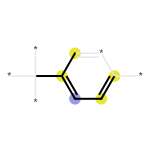

In [93]:
# Which fragment makes a bit ON? or  display the feature that turn a bit ON?

Draw.DrawMorganBit(dataset.structure[0], 129, onBit)

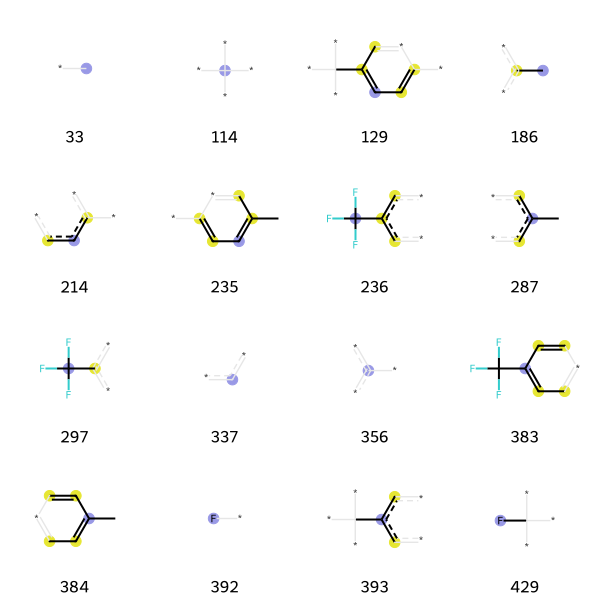

In [99]:
# Render all the fragments that are responsible for making ON bits

all_fragments=[(dataset.structure[0],x,onBit) for x in MF.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4,legends=[str(x) for x in MF.GetOnBits()])